# Práctica 2
## Desarrollado por Sara Pérez y Cristian Fernández
## 21 de Octubre de 2017
## Aprendizaje automático, EPS, UAM (Madrid)
## Introducción

En esta práctica se introduce una serie de ejercicios para estudiar las técnicas de reducción de dimensionalidad. Seguiremos trabajando con los datos de la práctica anterior realizando un estudio para que intentemos determinar que parámetros son los mejores para un ejercicio de clasificación.
## Objetivo
El objetivo de esta práctica es que adquiramos conocimientos básicos para solventar problemas de reducción de dimensionalidad de los datos. Esto se enmarca dentro del área de preparación de datos previos a un algoritmo de _machine learning_.

## Trabajo Desarrollado

Tras una preparación previa de los datos que realizamos según lo aprendido en la práctica anterior, analizamos distintos métodos de reducción de dimensionalidad con el objetivo de aplicar luego un algoritmo de aprendizaje y evaluar la eficacia de dicho algoritmo en función de las variables eliminadas según los métodos descritos. Así somos capaces de evaluar los métodos aplicados de reducción de dimensionalidad.

### Cargando librerias

In [1]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Read Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.feature_selection as FS
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Simplifación de datos
#### Cargar datos

In [2]:
#Path para linux
path = '../Recursos/indian_liver_patient.csv'

#Path para Windows
#path = '..\Recursos\indian_liver_patient.csv'
dataset = pd.read_csv(path,delimiter=',',header=0)



# Eliminación de Missing values
dataset=dataset.dropna()

# Transformación de valores a binario
dataset["Gender"] = pd.Categorical.from_array(dataset["Gender"]).codes

#Modificamos la clase, para que la clase pase de 1-2 a 0-1
dataset['Dataset']=dataset['Dataset']-1

# División aleatorioa 70 Traning 30 Test
train_test=train_test_split(dataset, test_size=0.3)
train=train_test[0]
test=train_test[1]

dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,0


In [3]:
#Separamos la variable target del resto
train_Y=train["Dataset"]
train_X=train.drop("Dataset",1)

test_Y=test["Dataset"]
test_X=test.drop("Dataset",1)

### Mutual information

In [4]:
mi_regr =  FS.mutual_info_regression(train_X, train_Y)
 
print(mi_regr)

indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)


[ 0.06401742  0.          0.06903248  0.08323759  0.04697193  0.04259962
  0.04890948  0.          0.00609292  0.04171942]
[3 2 0 6 4 5 9 8 7 1]


Como en cada ejecución de información mutua los valores varian bastante, debido a los bajos resultados obtenidos, hemos decidido realizar el calculo 100 veces y trabajar con la media de los calculos, donde vemos que ya mas o menos se obtienen resultados similares, o con cambios de posicion pequeños. 
Algunos ejemplos de variacion de indices:<br>
ej1: 5 0 9 6 3 4 2 8 7 1 <br>
ej2: 0 6 3 4 2 5 8 9 1 7<br>
ej3: 0 6 2 3 5 1 4 9 8 7<br>
ej4: 6 2 3 0 9 5 8 4 7 1<br>
ej5: 9 2 3 0 6 5 4 8 7 1<br>


In [5]:
mi_regr = [ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,]
for i in range(1, 100):
    mi_regr = mi_regr+ FS.mutual_info_regression(train_X, train_Y)

mi_regr=mi_regr/100   
print(mi_regr)
names=train_X.axes[1]
print (names)
indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)
#print(names)
names[indice_regr]

[ 0.05560616  0.01200973  0.05340581  0.06753126  0.05590145  0.04172921
  0.06178207  0.00022188  0.01571586  0.0241027 ]
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
[3 6 4 0 2 5 9 8 1 7]


Index(['Direct_Bilirubin', 'Aspartate_Aminotransferase',
       'Alkaline_Phosphotase', 'Age', 'Total_Bilirubin',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Albumin',
       'Gender', 'Total_Protiens'],
      dtype='object')

En el caso de realizar la media vemos que los valores no varian tanto de una ejecucion a otra:<br>
ej1:3 5 0 6 2 4 9 1 8 7<br>
ej2:3 0 5 6 2 4 9 8 1 7<br>
ej3:3 0 5 6 2 4 9 8 1 7<br>
ej4:3 5 6 0 2 4 9 8 1 7<br>
ej5:5 6 3 0 2 4 9 8 1 7<br>

Y nos a partir de aqui vamos a usar los valores de ejecución 2 y 3 que son los mismos.

In [6]:
indice_regr = [ 3, 0, 5, 6, 2, 4, 9, 8, 1, 7]
regr_var=names[indice_regr]
regr_var

Index(['Direct_Bilirubin', 'Age', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender', 'Total_Protiens'],
      dtype='object')

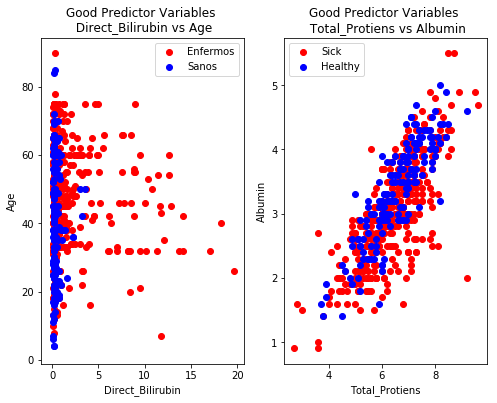

In [7]:
plt.figure(figsize=(8,6))
plt.subplot(121)

plt.scatter(dataset[dataset.Dataset==0].Direct_Bilirubin,dataset[dataset.Dataset==0].Age, color='red')
plt.scatter(dataset[dataset.Dataset==1].Direct_Bilirubin,dataset[dataset.Dataset==1].Age, color='blue')
plt.title('Good Predictor Variables \n Direct_Bilirubin vs Age')
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Age')
plt.legend(['Enfermos','Sanos'])

plt.subplot(122)

plt.scatter(dataset[dataset.Dataset==0].Total_Protiens,dataset[dataset.Dataset==0].Albumin, color='red')
plt.scatter(dataset[dataset.Dataset==1].Total_Protiens,dataset[dataset.Dataset==1].Albumin, color='blue')
plt.title('Good Predictor Variables \n Total_Protiens vs Albumin')
plt.xlabel('Total_Protiens')
plt.ylabel('Albumin')
plt.legend(['Sick','Healthy'])
plt.show()

Como se ve en las graficas, aunque las primeras dos variables (Direct_Bilirubin y Age) no separan bien los elementos, algo de esperar por los resultados tan bajos obtenidos, si estan mejor separadas que con dos de las tres ultimas variables (Total_Protiens y Albumin)

In [8]:
def specificity(y_true, y_pred):
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    return tn/(tn+fp) 


In [9]:
#Con todas las variables 10
modelo_lr = LogisticRegression()
modelo_lr.fit(X=train_X,y=train_Y)

predicion = modelo_lr.predict(test_X)
print('Regresion logistica con todas las variables\n')
print(f'\tprecision_score={metrics.precision_score(y_true=test_Y, y_pred=predicion)}')
print(f'\trecall_score={metrics.recall_score(y_true=test_Y, y_pred=predicion)}')
print(f'\taccuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')
print(f'\tspecificity_score={specificity(y_true=test_Y, y_pred=predicion)}')

Regresion logistica con todas las variables

	precision_score=0.5555555555555556
	recall_score=0.2
	accuracy_score=0.7241379310344828
	specificity_score=0.9354838709677419


In [10]:
train_X_copia=train_X.copy()
test_X_copia=test_X.copy()
allvar="";
#quitando variables
nvar=9
for i in regr_var[:0:-1]:
    allvar=allvar+i+", "
    train_X_copia=train_X_copia.drop(i,1)
    test_X_copia=test_X_copia.drop(i,1)
    modelo_lr = LogisticRegression()
    modelo_lr.fit(X=train_X_copia,y=train_Y)
    
    print('Con',nvar," variables")
    nvar=nvar-1
    print('Quitando \n'+allvar+"\n")
    predicion = modelo_lr.predict(test_X_copia)

    print(f'\tprecision_score={metrics.precision_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\trecall_score={metrics.recall_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\taccuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\tspecificity_score={specificity(y_true=test_Y, y_pred=predicion)}')

Con 9  variables
Quitando 
Total_Protiens, 

	precision_score=0.5555555555555556
	recall_score=0.2
	accuracy_score=0.7241379310344828
	specificity_score=0.9354838709677419
Con 8  variables
Quitando 
Total_Protiens, Gender, 

	precision_score=0.5
	recall_score=0.18
	accuracy_score=0.7126436781609196
	specificity_score=0.9274193548387096
Con 7  variables
Quitando 
Total_Protiens, Gender, Albumin, 

	precision_score=0.5294117647058824
	recall_score=0.18
	accuracy_score=0.7183908045977011
	specificity_score=0.9354838709677419
Con 6  variables
Quitando 
Total_Protiens, Gender, Albumin, Albumin_and_Globulin_Ratio, 

	precision_score=0.5714285714285714
	recall_score=0.16
	accuracy_score=0.7241379310344828
	specificity_score=0.9516129032258065
Con 5  variables
Quitando 
Total_Protiens, Gender, Albumin, Albumin_and_Globulin_Ratio, Alkaline_Phosphotase, 

	precision_score=0.7777777777777778
	recall_score=0.14
	accuracy_score=0.7413793103448276
	specificity_score=0.9838709677419355
Con 4  variabl

## Chi2

In [11]:
#EN chi^2 no se pueden usar valores negativos, por lo que no se pueden usar los datos normalizados 
chi = FS.chi2(X = train_X, y = train_Y)[0]
print(chi)
indice_chi=np.argsort(chi)[::-1]
print(indice_chi)
print(names[indice_chi])
chi_var=names[indice_chi]

[  3.17675288e+01   6.10443964e-01   2.49961450e+02   1.37429266e+02
   3.77730920e+03   3.78690817e+03   5.38536100e+03   3.72914745e-02
   2.34393252e+00   1.65552507e+00]
[6 5 4 2 3 0 8 9 1 7]
Index(['Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
       'Alkaline_Phosphotase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age',
       'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender', 'Total_Protiens'],
      dtype='object')


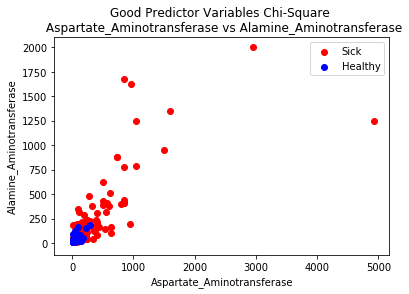

In [12]:
plt.figure()
plt.scatter(dataset[dataset.Dataset==0].Aspartate_Aminotransferase,dataset[dataset.Dataset==0].Alamine_Aminotransferase, color='red')
plt.scatter(dataset[dataset.Dataset==1].Aspartate_Aminotransferase,dataset[dataset.Dataset==1].Alamine_Aminotransferase, color='blue')
plt.title('Good Predictor Variables Chi-Square \n Aspartate_Aminotransferase vs Alamine_Aminotransferase')
plt.xlabel('Aspartate_Aminotransferase')
plt.ylabel('Alamine_Aminotransferase')
plt.legend(['Sick','Healthy'])
plt.show()

In [13]:
train_X_copia=train_X.copy()
test_X_copia=test_X.copy()
allvar="";
nvar=9
#quitando variables
for i in chi_var[:0:-1]:
    allvar=allvar+i+", "
    train_X_copia=train_X_copia.drop(i,1)
    test_X_copia=test_X_copia.drop(i,1)
    modelo_lr = LogisticRegression()
    modelo_lr.fit(X=train_X_copia,y=train_Y)
    print('Con',nvar," variables")
    nvar=nvar-1
    print('Quitando \n'+allvar+'\n')
    predicion = modelo_lr.predict(test_X_copia)
    print(f'\tprecision_score={metrics.precision_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\trecall_score={metrics.recall_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\taccuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\tspecificity_score={specificity(y_true=test_Y, y_pred=predicion)}')

Con 9  variables
Quitando 
Total_Protiens, 

	precision_score=0.5555555555555556
	recall_score=0.2
	accuracy_score=0.7241379310344828
	specificity_score=0.9354838709677419
Con 8  variables
Quitando 
Total_Protiens, Gender, 

	precision_score=0.5
	recall_score=0.18
	accuracy_score=0.7126436781609196
	specificity_score=0.9274193548387096
Con 7  variables
Quitando 
Total_Protiens, Gender, Albumin_and_Globulin_Ratio, 

	precision_score=0.5555555555555556
	recall_score=0.2
	accuracy_score=0.7241379310344828
	specificity_score=0.9354838709677419
Con 6  variables
Quitando 
Total_Protiens, Gender, Albumin_and_Globulin_Ratio, Albumin, 

	precision_score=0.5714285714285714
	recall_score=0.16
	accuracy_score=0.7241379310344828
	specificity_score=0.9516129032258065
Con 5  variables
Quitando 
Total_Protiens, Gender, Albumin_and_Globulin_Ratio, Albumin, Age, 

	precision_score=0.16666666666666666
	recall_score=0.02
	accuracy_score=0.6896551724137931
	specificity_score=0.9596774193548387
Con 4  varia

## PCA

Según se ha visto es teoría, PCA es un método que varía según la escala que apliquemos, así pues, el análisis que realizaremos será con datos normalizados. Para ello usaremos el objeto preprocessing de la librería _skleanr_.

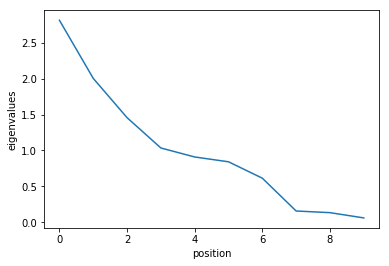

Eigenvalues
 [ 2.81391024  2.00434693  1.45681856  1.03445952  0.90917585  0.84198396
  0.61363037  0.15655924  0.13362989  0.06023791]

Explained variance ratio:
 [ 0.28069623  0.19993979  0.14532215  0.10319053  0.0906931   0.0839905
  0.06121152  0.01561727  0.01332999  0.00600892]


In [14]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing

X_scaled = preprocessing.scale(train_X)
pca = PCA()
pca.fit(X_scaled)

# Representamos los resultados de PCA
plt.plot(pca.explained_variance_)
plt.ylabel("eigenvalues")
plt.xlabel("position")
plt.show()
print ("Eigenvalues\n",pca.explained_variance_)

# # Porcentaje de varianza por cada componente
print('\nExplained variance ratio:\n %s'
      % str(pca.explained_variance_ratio_))

In [15]:
pca = pca.explained_variance_ratio_

indice_pca=np.argsort(pca)[::-1]
print(indice_pca)
print(names[indice_pca])
pca_var=names[indice_pca]

train_X_copia=train_X.copy()
test_X_copia=test_X.copy()
allvar="";
nvar=9

# Calculamos algoritmo de ML según variables guiadas por PCA
for i in pca_var[:0:-1]:
    allvar=allvar+i+", "
    train_X_copia=train_X_copia.drop(i,1)
    test_X_copia=test_X_copia.drop(i,1)
    modelo_lr = LogisticRegression()
    modelo_lr.fit(X=train_X_copia,y=train_Y)
    print('Con',nvar," variables")
    nvar=nvar-1
    print('Quitando \n'+allvar+'\n')
    predicion = modelo_lr.predict(test_X_copia)
    print(f'\tprecision_score={metrics.precision_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\trecall_score={metrics.recall_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\taccuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\tspecificity_score={specificity(y_true=test_Y, y_pred=predicion)}')  




[0 1 2 3 4 5 6 7 8 9]
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
Con 9  variables
Quitando 
Albumin_and_Globulin_Ratio, 

	precision_score=0.5555555555555556
	recall_score=0.2
	accuracy_score=0.7241379310344828
	specificity_score=0.9354838709677419
Con 8  variables
Quitando 
Albumin_and_Globulin_Ratio, Albumin, 

	precision_score=0.5625
	recall_score=0.18
	accuracy_score=0.7241379310344828
	specificity_score=0.9435483870967742
Con 7  variables
Quitando 
Albumin_and_Globulin_Ratio, Albumin, Total_Protiens, 

	precision_score=0.5714285714285714
	recall_score=0.16
	accuracy_score=0.7241379310344828
	specificity_score=0.9516129032258065
Con 6  variables
Quitando 
Albumin_and_Globulin_Ratio, Albumin, Total_Protiens, Aspartate_Aminotransferase, 

	precision_score=0.6
	recall_score=0.18
	acc

Según hemos visto con las pruebas anteriores, podemos ver como alcanzamos la mejor precisión quitando las variables _Albumin_and_Globulin_Ratio, Albumin, Total_Protiens, Aspartate_Aminotransferase, Alamine_Aminotransferase, Alkaline_Phosphotase_. Hasta ahora ha sido el mejor resultado que hemos obtenido entre todos los métodos.

# LDA

Al contrario de PCA, LDA es invariante a escala y por tanto no tenemos por que trabajara con los datos normalizados.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(train_X,train_Y)

print("Porcentaje explicado:", lda.explained_variance_ratio_)

ldaRes = lda.explained_variance_ratio_
indice_lda=np.argsort(ldaRes)[::-1]
print(indice_lda)
print(names[indice_lda])
pca_var=names[indice_lda]

train_X_copia=train_X.copy()
test_X_copia=test_X.copy()
allvar="";
nvar=9

#quitando variables
for i in pca_var[:0:-1]:
    allvar=allvar+i+", "
    train_X_copia=train_X_copia.drop(i,1)
    test_X_copia=test_X_copia.drop(i,1)
    modelo_lr = LogisticRegression()
    modelo_lr.fit(X=train_X_copia,y=train_Y)
    print('Con',nvar," variables")
    nvar=nvar-1
    print('Quitando \n'+allvar+'\n')
    predicion = modelo_lr.predict(test_X_copia)
    print(f'\tprecision_score={metrics.precision_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\trecall_score={metrics.recall_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\taccuracy_score={metrics.accuracy_score(y_true=test_Y, y_pred=predicion)}')
    print(f'\tspecificity_score={specificity(y_true=test_Y, y_pred=predicion)}')


Porcentaje explicado: [ 1.]
[0]
Index(['Age'], dtype='object')


Según vemos como resultado, LDA nos da un unos resultados que no nos sirven para discernir entre ninguna de las variables.

Esto se da debido a que los datos con los que trabajamos no se asemejan a una distribución gaussiana.

# Conclusiones

Según los resultados obtenidos, el mejor método es PCA pero hay que dejar claro que esto es sólamente debido a los datos que tenemos. Por tanto, eliminar las variables _Albumin_and_Globulin_Ratio, Albumin, Total_Protiens, Aspartate_Aminotransferase, Alamine_Aminotransferase, Alkaline_Phosphotase_ nos hace alcanzar una precisión del 55% frente al 33% que nos da con todos los datos del conjunto. 

Con esta práctica hemos sido capaces de usar los métodos habituales de reducción de dimensionalidad y de darnos cuenta de su grán utilidad. Aun así, la dependencia de la distribución de los datos así como de su formato es algo a tener en cuenta, como ya hemos visto en la práctica anterior.